## 사용할 모델 
1. Matrix Factorization (SVD)
2. Logistic Regression

 학습 데이터셋 호출

In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:
with open("../pickle_files/user_user_training_matrix_2000.pickle", "rb") as f:
    train_data = pickle.load(f)

with open("../pickle_files/cos_result_sum_2000.pickle", "rb") as f:
    train_label = pickle.load(f)

print(type(train_data))
print(type(train_label))

<class 'dict'>
<class 'numpy.ndarray'>


### 학습 데이터를 dictionary 형태에서 DataFrame으로 변경

In [9]:
columns = ('education', 'religion', 'bodyType', 'diet', 'age', 'smokes', 'drinks', 'pets')
index = pd.MultiIndex.from_tuples(train_data.keys())
df = pd.DataFrame.from_dict(train_data, orient='index', columns=columns)
df.head(5)

,education,religion,bodyType,diet,age,smokes,drinks,pets
"(8195, 8195)",1.0,1.0,0.869592,1.0,1.00,1.0,1.0,2
"(8195, 8202)",0.5,0.5,0.934448,1.0,0.00,0.0,0.0,2
"(8195, 13)",0.5,0.5,0.787254,1.0,0.25,1.0,1.0,0
"(8195, 8207)",1.0,0.5,0.869592,1.0,0.25,1.0,1.0,0
"(8195, 17)",1.0,0.5,0.869592,1.0,0.50,1.0,1.0,2


### 학습 label을 numpy 에서 DataFrame으로 변경

In [42]:
data_label = pd.DataFrame(train_label)

In [43]:
print("label shape:",data_label.shape)
data_label.head(5)

label shape: (2000, 2000)


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,10.000001,3.258006,2.172685,3.288786,4.524014,4.262863,4.425867,1.952833,3.780606,3.277067,...,4.393709,5.183300,4.408846,4.114955,5.644509,2.207893,2.712091,2.719143,2.005965,4.570388
1,3.258006,10.000000,3.581994,3.532227,3.974113,4.040970,4.818295,2.221856,3.081551,3.153311,...,4.663496,4.541522,4.414474,4.727452,2.826968,2.756586,3.080917,2.130292,3.932566,3.323575
2,2.172685,3.581994,10.000001,4.211419,3.140306,3.088926,3.565549,3.222371,3.639046,1.594120,...,3.612458,3.501130,3.931247,3.628038,2.791378,3.634598,5.535552,2.814210,4.580935,3.860979
3,3.288786,3.532227,4.211419,10.000001,3.013701,3.390862,2.567312,5.899020,3.066927,4.088910,...,2.621695,2.422608,3.039518,3.297323,3.078377,4.652130,3.313797,2.959043,6.235013,4.097363
4,4.524014,3.974113,3.140306,3.013701,10.000001,4.937578,5.013460,0.762407,3.319923,3.190665,...,4.512901,5.185453,4.652572,4.604312,4.106547,2.418272,3.866645,2.982009,2.751265,4.199334


### train label의 index를 user_id로 변경

In [31]:
user_index = []
for i in tqdm(index):
    if i[0] not in user_index:
        user_index.append(i[0])


100%|█████████████████████████████████████████████████████████████████████| 4000000/4000000 [00:57<00:00, 70081.25it/s]


In [44]:
user_index

['8195',
 '8202',
 '13',
 '8207',
 '17',
 '8210',
 '8209',
 '21',
 '8215',
 '25',
 '31',
 '8226',
 '37',
 '41',
 '8237',
 '8238',
 '48',
 '61',
 '8254',
 '8256',
 '69',
 '8263',
 '8265',
 '75',
 '91',
 '94',
 '96',
 '103',
 '104',
 '8297',
 '8301',
 '109',
 '114',
 '115',
 '8312',
 '126',
 '8325',
 '8328',
 '144',
 '8341',
 '151',
 '8344',
 '8343',
 '157',
 '8350',
 '159',
 '8362',
 '172',
 '180',
 '8373',
 '8378',
 '204',
 '8397',
 '8398',
 '212',
 '215',
 '8414',
 '224',
 '227',
 '8421',
 '8424',
 '235',
 '8439',
 '8441',
 '251',
 '8447',
 '256',
 '8448',
 '8450',
 '261',
 '8455',
 '8457',
 '8459',
 '8463',
 '272',
 '8470',
 '278',
 '281',
 '286',
 '8479',
 '287',
 '8478',
 '8482',
 '8480',
 '8485',
 '8490',
 '299',
 '300',
 '304',
 '306',
 '8505',
 '8513',
 '8516',
 '8519',
 '8521',
 '8522',
 '8526',
 '347',
 '8540',
 '8542',
 '351',
 '8543',
 '8544',
 '8548',
 '362',
 '363',
 '367',
 '8560',
 '8579',
 '8581',
 '393',
 '8590',
 '8599',
 '409',
 '8608',
 '421',
 '8615',
 '427',
 '429

In [45]:
data_label.index = user_index

In [47]:
data_label.columns = user_index

In [49]:
data_label

,8195,8202,13,8207,17,8210,8209,21,8215,25,...,8108,8109,8128,8136,8137,8154,8160,8161,8174,8181
8195,10.000001,3.258006,2.172685,3.288786,4.524014,4.262863,4.425867,1.952833,3.780606,3.277067,...,4.393709,5.183300,4.408846,4.114955,5.644509,2.207893,2.712091,2.719143,2.005965,4.570388
8202,3.258006,10.000000,3.581994,3.532227,3.974113,4.040970,4.818295,2.221856,3.081551,3.153311,...,4.663496,4.541522,4.414474,4.727452,2.826968,2.756586,3.080917,2.130292,3.932566,3.323575
13,2.172685,3.581994,10.000001,4.211419,3.140306,3.088926,3.565549,3.222371,3.639046,1.594120,...,3.612458,3.501130,3.931247,3.628038,2.791378,3.634598,5.535552,2.814210,4.580935,3.860979
8207,3.288786,3.532227,4.211419,10.000001,3.013701,3.390862,2.567312,5.899020,3.066927,4.088910,...,2.621695,2.422608,3.039518,3.297323,3.078377,4.652130,3.313797,2.959043,6.235013,4.097363
17,4.524014,3.974113,3.140306,3.013701,10.000001,4.937578,5.013460,0.762407,3.319923,3.190665,...,4.512901,5.185453,4.652572,4.604312,4.106547,2.418272,3.866645,2.982009,2.751265,4.199334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,2.207893,2.756586,3.634598,4.652130,2.418272,3.574651,2.370647,5.754597,3.830853,4.900957,...,2.841898,1.626347,2.596393,3.689013,1.887048,10.000000,2.899637,3.300013,5.609474,3.335605
8160,2.712091,3.080917,5.535552,3.313797,3.866645,3.375838,4.208847,2.022153,3.233557,2.022628,...,3.915110,3.656490,4.048195,4.248548,3.103765,2.899637,10.000000,3.032704,3.461999,3.636301
8161,2.719143,2.130292,2.814210,2.959043,2.982009,2.590298,2.231909,3.152900,3.499840,2.834177,...,2.676013,2.120723,3.113924,3.059761,2.978565,3.300013,3.032704,10.000000,2.912405,2.752478
8174,2.005965,3.932566,4.580935,6.235013,2.751265,3.501731,1.651545,6.880414,2.159051,4.247758,...,2.077940,1.332057,2.247602,3.677717,2.090132,5.609474,3.461999,2.912405,10.000001,3.694510


In [52]:
data_label.to_csv("./OKCUPID_data_label_2000.csv")

In [53]:
df.to_csv("./OKCUPD_data_train_2000.csv")

# scikit learn 추천 시스템

In [54]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [56]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(data_label)
matrix.shape

(2000, 12)

In [57]:
corr = np.corrcoef(matrix)
corr.shape

(2000, 2000)

In [58]:
corr2 = corr[:100, :100]
corr2.shape

(100, 100)

<AxesSubplot:>

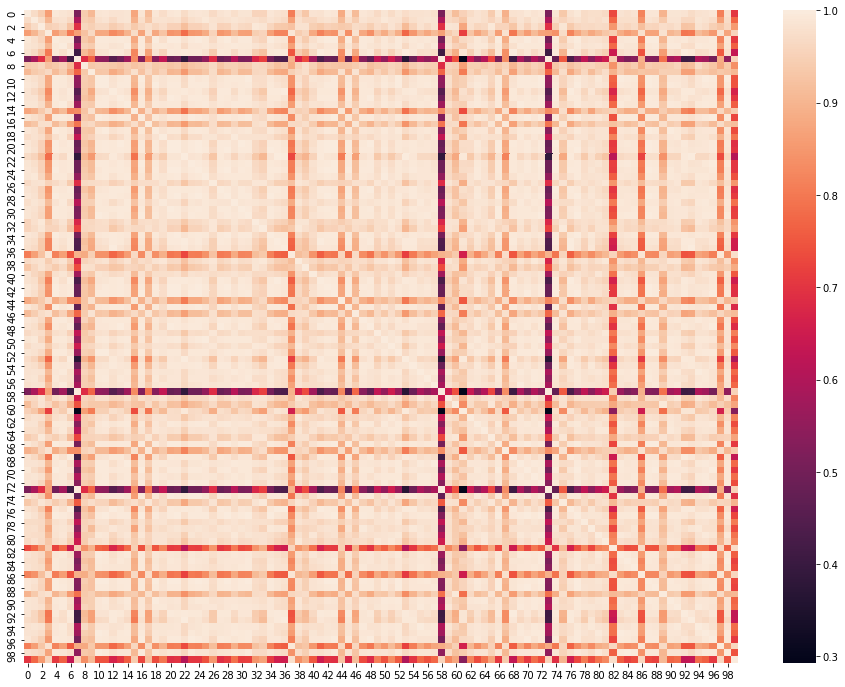

In [59]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr2)

In [63]:
user_index = data_label.columns
user_index_list = list(user_index)
coffey_hands = user_index_list.index("8154")

In [65]:
corr_coffey_hands = corr[coffey_hands]

In [67]:
corr_coffey_hands.shape

(2000,)

In [70]:
list(user_index[corr_coffey_hands >= 0.99])[:50]

['662',
 '1580',
 '1984',
 '2057',
 '10659',
 '11160',
 '3030',
 '4899',
 '5378',
 '6213',
 '8154']